# heart dieses classification project   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import sklearn






In [2]:
!pip install scikit-learn



# load  the dataset

In [3]:
df=pd.read_csv('heart.csv')

# first few row of the dataset

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# dimension  of the dataset

In [5]:
df.shape

(1025, 14)

# over all description  of the datset

In [6]:
df.describe

<bound method NDFrame.describe of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0        

# all the columns names in the dataset

age

sex

chest pain type (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# data cleaning

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.dropna(inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


#  Feature selection

In [10]:
# Create feature matrix (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']


# target veriable

In [11]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

# Split the dataset into training and testing sets

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape ,X_test.shape

((820, 13), (205, 13))

In [14]:
y_train.shape ,y_test.shape

((820,), (205,))

# selection the  classification model

In [15]:
#  Build and Train the Machine Learning Model
# Initialize a RandomForestClassifier and train the model using the training set.
from sklearn.svm import SVC
# Initialize the SVM model (you can adjust hyperparameters)
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

# prediction  of the model on the testing data

In [16]:
# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)


# model accuracy

In [17]:
# Evaluate the SVM model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy: {accuracy_svm:.2f}")




SVM Model Accuracy: 0.80


In [18]:
# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))




Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.71      0.78       102
           1       0.76      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.82      0.80      0.80       205
weighted avg       0.82      0.80      0.80       205




Confusion Matrix:


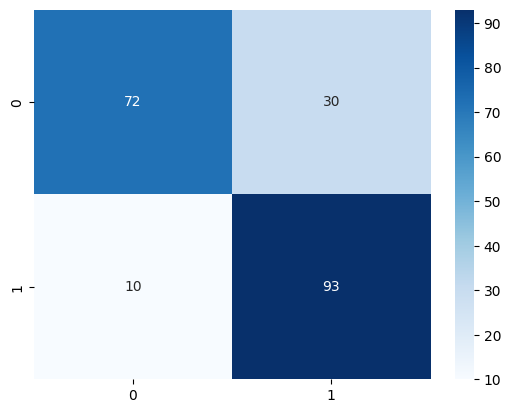

In [19]:
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap='Blues', fmt='g')
plt.show()

# using the RandomForestClassifier  model

In [20]:
from sklearn.ensemble import RandomForestClassifier


In [21]:
model= RandomForestClassifier()

In [22]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [24]:
# Evaluate the randomforest model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
accuracy_RF = accuracy_score(y_test, y_pred)
print(f"randomforest Model Accuracy: {accuracy_RF:.2f}")

randomforest Model Accuracy: 0.99


In [25]:
# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205




Confusion Matrix:


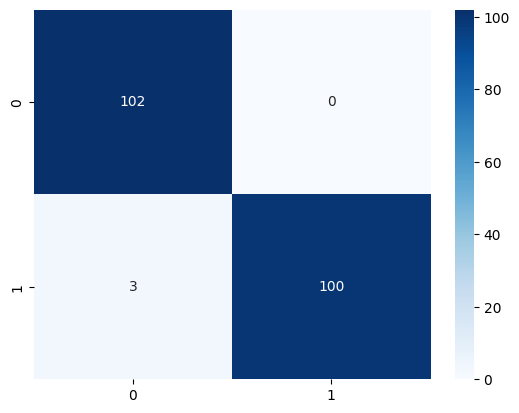

In [26]:
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.show()

# model comparison

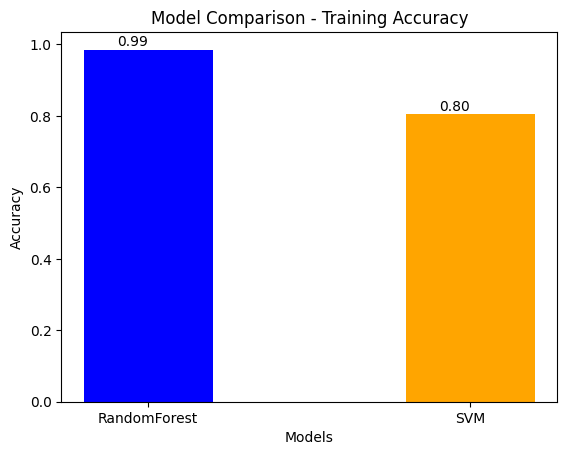

In [27]:

# Assuming you have accuracy values for both models
accuracy_RF  # Replace with the actual RandomForest accuracy
accuracy_svm   # Replace with the actual SVM accuracy

# Data for plotting
models = ['RandomForest', 'SVM']
accuracy_values = [accuracy_RF, accuracy_svm]

# Plotting
fig, ax = plt.subplots()
bar_width = 0.4
bar_positions = np.arange(len(models))

bars = plt.bar(bar_positions, accuracy_values, bar_width, color=['blue', 'orange'])

# Adding labels
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Training Accuracy')
plt.xticks(bar_positions, models)

# Adding the accuracy values on top of the bars
for bar, acc in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, bar.get_height() + 0.01, f'{acc:.2f}', ha='center', color='black')

# Show the plot
plt.show()


# prediction system for the user to input the data

In [28]:
import numpy as np

# Example input data for a patient:
input_data_str = input(
    "Enter the patient's data in the following format:\n"
    "(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)\n"
)

# Remove any extra commas and parse the input string into a list of numerical values
input_values = [float(value) for value in input_data_str.replace(',', '').split()]

# Convert the list to a NumPy array
input_data_array = np.array([input_values])

# Reshape the array for a single instance
input_data_reshaped = input_data_array.reshape(1, -1)

# Make prediction
prediction = model.predict(input_data_reshaped)

# Display prediction result
result_mapping = {0: "No Heart Disease", 1: "Heart Disease"}
print(f"Prediction Result: {result_mapping[prediction[0]]}")
if prediction[0] == 1:
    print("This patient is predicted to have heart disease.")
else:
    print("This patient is predicted to be healthy.")


Enter the patient's data in the following format:
(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)
70	1	0	145	174	0	1	125	1	2.6	0	0	3
Prediction Result: No Heart Disease
This patient is predicted to be healthy.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [29]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.6 MB/s eta 0:00:00


In [30]:
import pickle

In [31]:
filename='train_model.pkl'

In [32]:
pickle.dump(model,open(filename,'wb'))

In [33]:
loded_model=pickle.load(open('train_model.pkl','rb'))